In [27]:
import yt
from yt.units import dimensions
import numpy as np
import unyt

In [28]:
ds = yt.load("parthenon.prim.00001.phdf")

yt : [INFO     ] 2023-10-25 15:38:56,732 Parameters: current_time              = 100.16124501218827
yt : [INFO     ] 2023-10-25 15:38:56,733 Parameters: domain_dimensions         = [ 64  64 128]
yt : [INFO     ] 2023-10-25 15:38:56,733 Parameters: domain_left_edge          = [ -50.  -50. -100.]
yt : [INFO     ] 2023-10-25 15:38:56,733 Parameters: domain_right_edge         = [ 50.  50. 100.]
yt : [ERROR    ] 2023-10-25 15:38:56,734 Missing cosmological_simulation in parameter file definition!


In [33]:
# compute histogram of dK/K
def _abs_z(field, data):
    return np.abs(data["parthenon", "z"])

ds.add_field(
    name=("parthenon", "abs_z"),
    function=_abs_z,
    sampling_type="local",
    units=dimensions.length
)

source = ds.all_data()

custom_bins = np.linspace(-1,1,40)
histogram = yt.data_objects.profiles.create_profile(source,
    [("parthenon", "abs_z"), ("parthenon", "entropy")],
    [("gas", "cell_mass")]
    , override_bins={("parthenon", "entropy"): custom_bins, ("parthenon", "abs_z"): None})


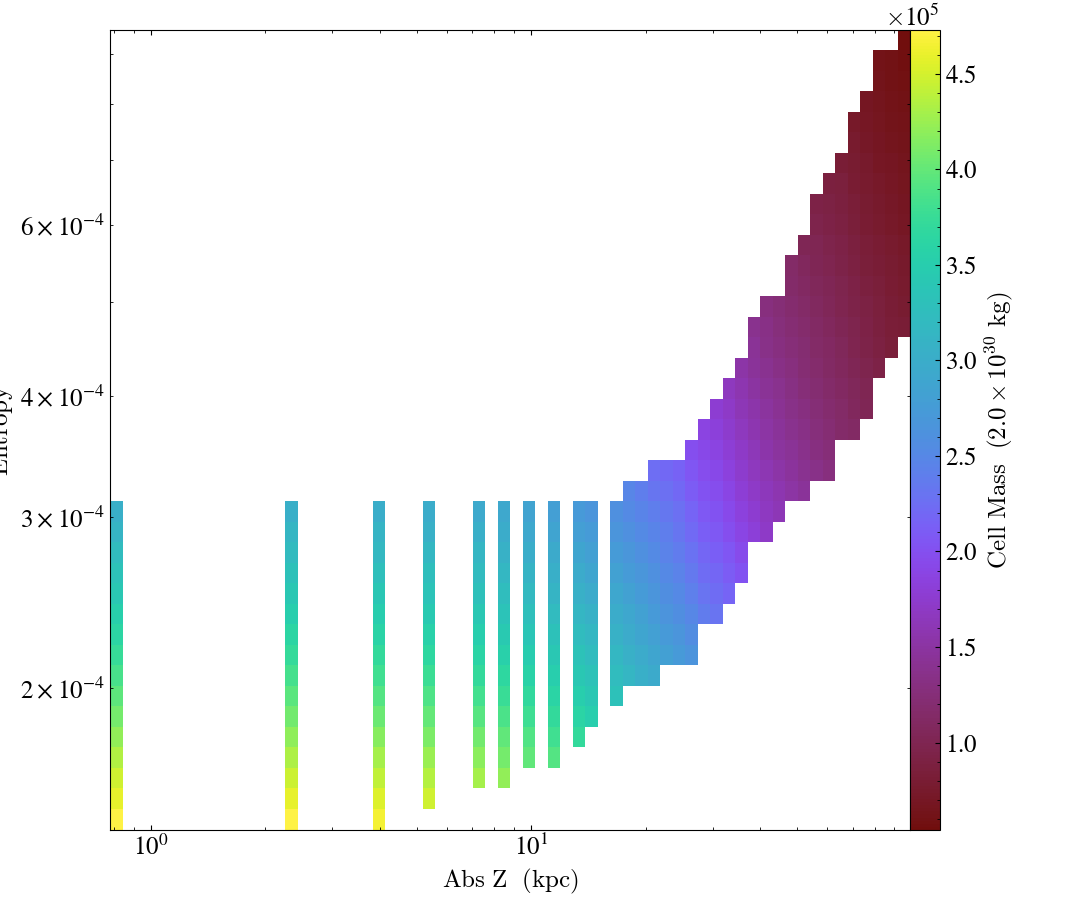

In [38]:
histogram.plot().set_log(("parthenon","entropy"), True).set_log(("gas","cell_mass"), False).set_unit(("parthenon","abs_z"), unyt.kpc).set_unit(("gas","cell_mass"),unyt.msun)